In [1]:
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage
from langgraph.graph import add_messages, StateGraph, END
from langchain_groq import ChatGroq

In [2]:
class State(TypedDict): 
    messages: Annotated[list, add_messages]

In [3]:
llm = ChatGroq(model="llama-3.1-8b-instant")


In [4]:
GENERATE_POST = "generate_post"
GET_REVIEW_DECISION = "get_review_decision"
POST = "post"
COLLECT_FEEDBACK = "collect_feedback"

In [5]:
def generate_post(state: State): 
    return {
        "messages": [llm.invoke(state["messages"])]
    }

In [6]:
def get_review_decision(state: State):  
    post_content = state["messages"][-1].content 
    
    print("\n📢 Current LinkedIn Post:\n")
    print(post_content)
    print("\n")

    decision = input("Post to LinkedIn? (yes/no): ")

    if decision.lower() == "yes":
        return POST
    else:
        return COLLECT_FEEDBACK


In [7]:
def post(state: State):  
    final_post = state["messages"][-1].content  
    print("\n📢 Final LinkedIn Post:\n")
    print(final_post)
    print("\n✅ Post has been approved and is now live on LinkedIn!")

def collect_feedback(state: State):  
    feedback = input("How can I improve this post?")
    return {
        "messages": [HumanMessage(content=feedback)]
    }

In [8]:
graph = StateGraph(State)

graph.add_node(GENERATE_POST, generate_post)
graph.add_node(GET_REVIEW_DECISION, get_review_decision)
graph.add_node(COLLECT_FEEDBACK, collect_feedback)
graph.add_node(POST, post)

graph.set_entry_point(GENERATE_POST)

graph.add_conditional_edges(GENERATE_POST, get_review_decision)
graph.add_edge(POST, END)
graph.add_edge(COLLECT_FEEDBACK, GENERATE_POST)

app = graph.compile()

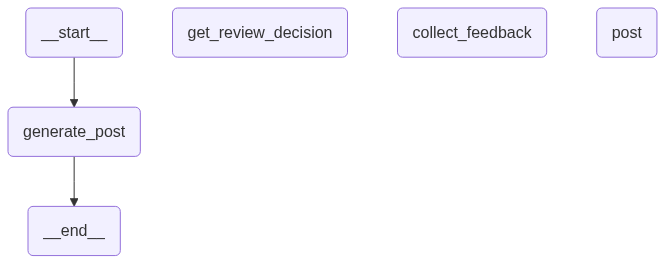

In [9]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
response = app.invoke({
    "messages": [HumanMessage(content="Write me a LinkedIn post on AI Agents taking over content creation")]
})
print(response)


📢 Current LinkedIn Post:

**The Future of Content Creation: Are AI Agents the New Boss?**

As we continue to push the boundaries of technology, one thing is becoming increasingly clear: AI agents are changing the game when it comes to content creation.

From generating engaging social media posts to crafting compelling articles, AI-powered tools are becoming more sophisticated by the day. But what does this mean for human content creators?

On one hand, AI agents offer unparalleled efficiency and scalability, allowing businesses and organizations to produce high-quality content at a fraction of the cost. They can analyze vast amounts of data, identify trends, and create content that resonates with audiences.

On the other hand, there's a growing concern that AI agents are taking over the very jobs that make content creation so valuable. Will we soon see a world where human writers, designers, and creators are replaced by machines?

**The benefits of AI-powered content creation:**

- *